In [7]:
import os
import sys
from pathlib import Path
import pandas as pd

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from analyzers.topic_modeller import TopicModeller
import matplotlib.pyplot as plt

In [8]:
OUTPUT_DIR = Path('../../images')

## Load Data

In [9]:
comments_df = pd.read_csv(Path('../data/processed/youtube_comments_luther_processed.csv'))

In [10]:
comments_df = comments_df.dropna(subset=['text'])

## WordCloud

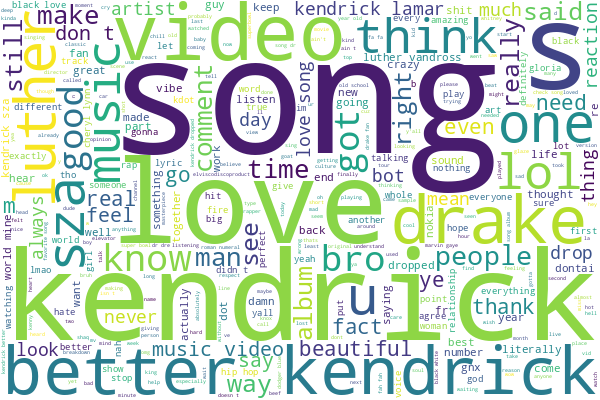

In [11]:
from wordcloud import WordCloud

long_string = ','.join(comments_df['text'])
wordcloud = WordCloud(background_color="white", max_words=1000, width=600, height=400)
wordcloud.generate(long_string) # Visualize the word cloud
wordcloud.to_image()

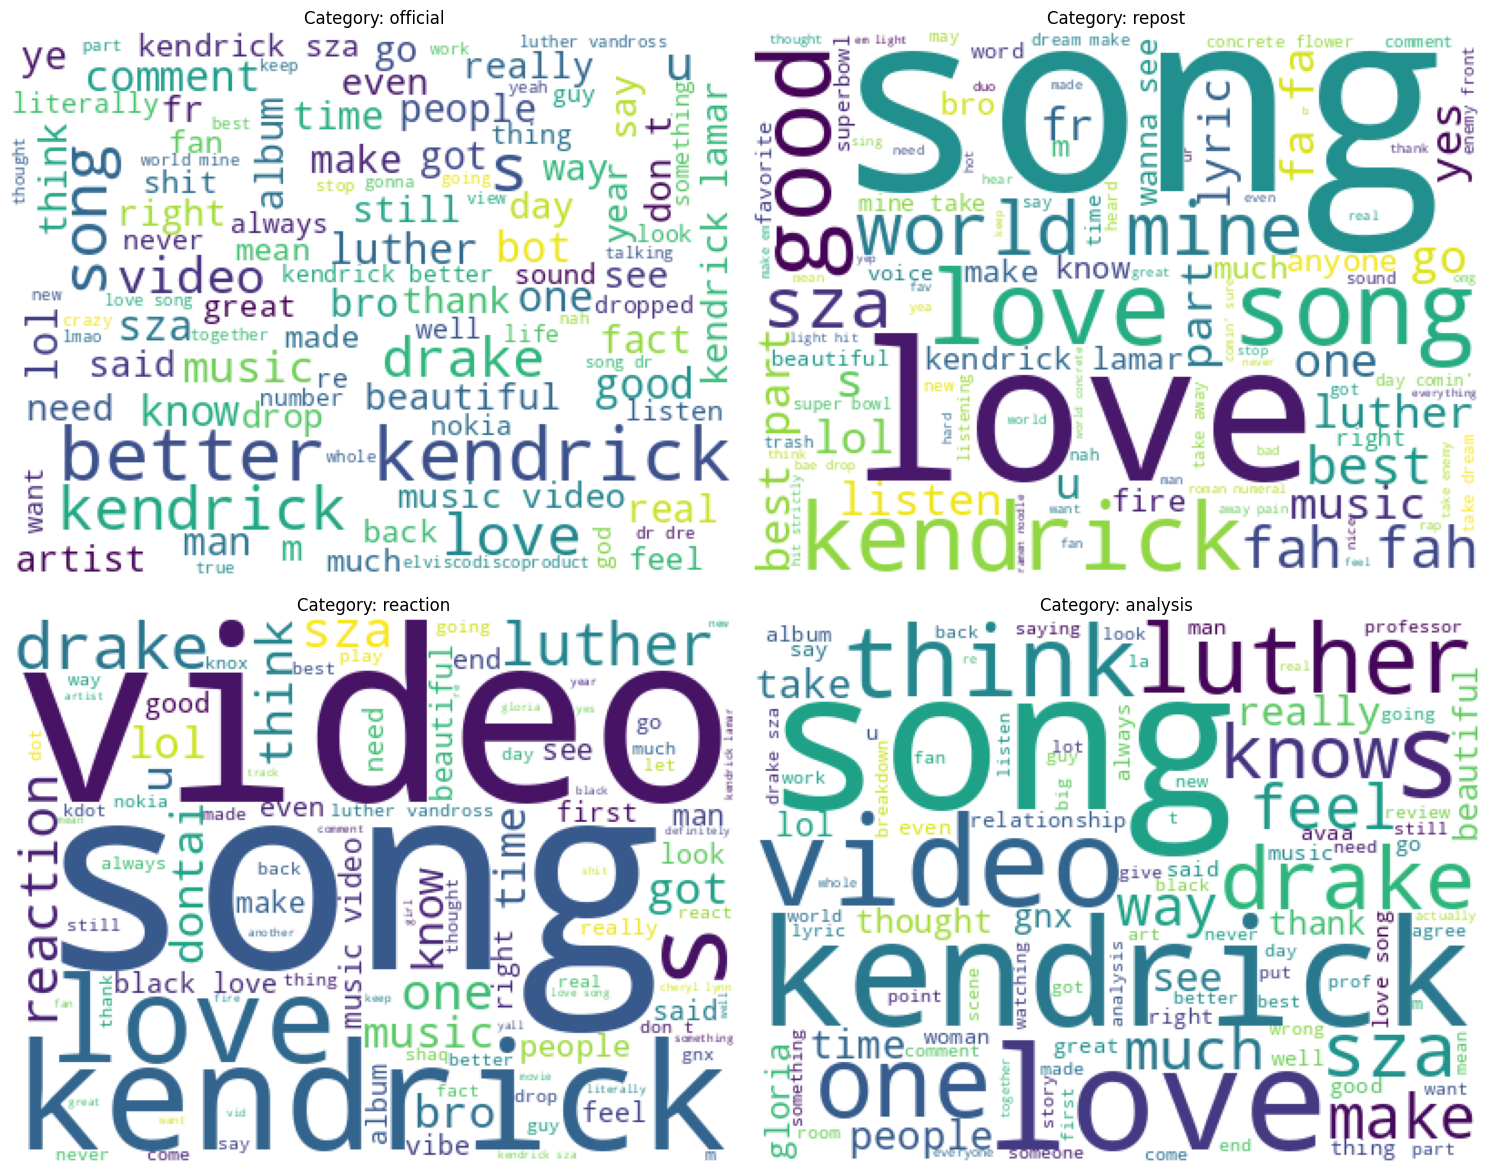

In [14]:
# Create word clouds based on comment categories
categories = comments_df['category'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, category in enumerate(categories):
    # Get comments for this category
    category_comments = comments_df[comments_df['category'] == category]['text']
    
    if len(category_comments) > 0:
        # Join all text for this category
        category_text = ' '.join(category_comments)
        
        # Generate word cloud
        wordcloud = WordCloud(
            background_color='white',
            max_words=100,
            width=400, 
            height=300
        ).generate(category_text)
        
        # Plot
        axes[idx].imshow(wordcloud)
        axes[idx].axis('off')
        axes[idx].set_title(f'Category: {category}')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'wordcloud_categories.png'), dpi=500)
plt.show()


## Topic Modelling

In [6]:
modeller = TopicModeller(n_topics=5)

##### *Find the optimal topics*

In [7]:
best_n_topics, best_score, coherence_scores = modeller.find_optimal_topics(
    texts=comments_df['text'],
    start=2,    # Start with 2 topics
    end=20,     # Try up to 20 topics
    step=1,     # Try each number of topics
    coherence_type='c_v'  # Use C_v coherence measure
)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>


INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary<14928 unique tokens: ['beat', 'flow', 'melody', 'vibe', '🔥']...>
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary<26570 unique tokens: ['beat', 'flow', 'melody', 'vibe', '🔥']...>
INFO:gensim.corpora.dictionary:built Dictionary<27406 unique tokens: ['beat', 'flow', 'melody', 'vibe', '🔥']...> from 21229 documents (total 148178 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<27406 unique tokens: ['beat', 'flow', 'melody', 'vibe', '🔥']...> from 21229 documents (total 148178 corpus positions)", 'datetime': '2025-05-24T08:56:44.862767', 'gensim': '4.3.3', 'python': '3.12.10 (main, May 24 2025, 00:18:55) [GCC 15.1.1 20250425]', 'platform': 'Linux-6.14.6-arch1-1-x86_64-with-glibc2.41', 'event': 'created'}
INFO:gensim.models.ldamodel:using autotuned alpha, starting with [0.5, 0.5]
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldam

In [8]:
print(f"Optimal number of topics: {best_n_topics}")
print(f"Best coherence score: {best_score:.4f}")


Optimal number of topics: 2
Best coherence score: 0.5611


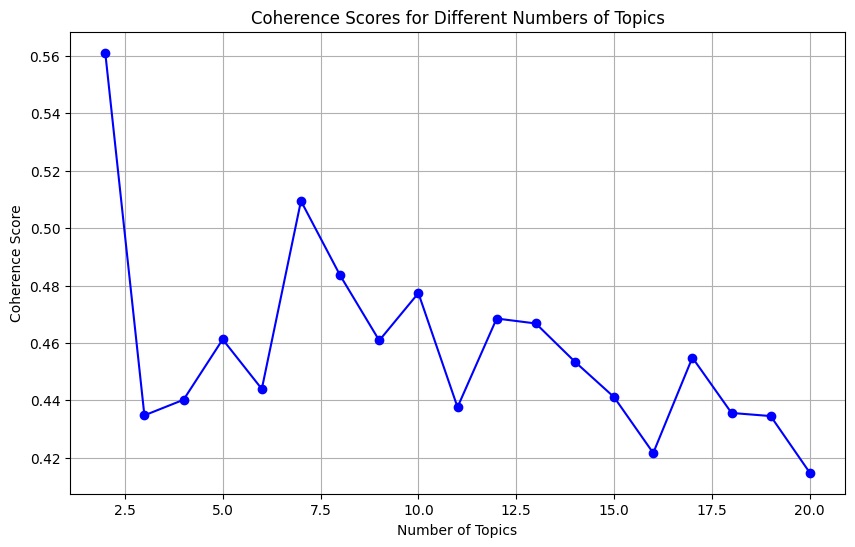

In [9]:
# Plot the coherence scores
modeller.plot_coherence_scores(coherence_scores)

#### *Topic Modelling*

In [15]:
modeller = TopicModeller(n_topics=7)

In [16]:
modeller.fit(comments_df['text'])

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary<14928 unique tokens: ['beat', 'flow', 'melody', 'vibe', '🔥']...>
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary<26570 unique tokens: ['beat', 'flow', 'melody', 'vibe', '🔥']...>
INFO:gensim.corpora.dictionary:built Dictionary<27406 unique tokens: ['beat', 'flow', 'melody', 'vibe', '🔥']...> from 21229 documents (total 148178 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<27406 unique tokens: ['beat', 'flow', 'melody', 'vibe', '🔥']...> from 21229 documents (total 148178 corpus positions)", 'datetime': '2025-05-24T09:34:22.709299', 'gensim': '4.3.3', 'python': '3.12.10 (main, May 24 2025, 00:18:55) [GCC 15.1.1 20250425]', 'platform': 'Linux-6.14.6-arch1-1-x86_64-with-glibc2.41', 'event': 'created'}
INFO:gensim.models.ldamodel:using autotuned alpha, starting with [0.14285715, 0.

In [17]:
for i in range(7):
    print(modeller.get_topic_name(i)) 

like_video_drake
love_kendrick_sza
kendrick_better_-
song_luther_love
react_favorite_please
put_super_fa
gnx_dropped_.


In [18]:
topics = modeller.get_topics(n_words=10)
for topic_id, words in topics.items():
    print(f"\nTopic {topic_id}:")
    for word, score in words:
        print(f"  {word}: {score:.3f}")


Topic 0:
  like: 0.029
  video: 0.025
  drake: 0.021
  music: 0.013
  it’s: 0.011
  think: 0.011
  u: 0.011
  😂: 0.010
  good: 0.010
  one: 0.010

Topic 1:
  love: 0.039
  kendrick: 0.031
  sza: 0.030
  black: 0.015
  reaction: 0.015
  never: 0.010
  like: 0.010
  feel: 0.009
  right: 0.008
  lamar: 0.007

Topic 2:
  kendrick: 0.090
  better: 0.062
  -: 0.042
  ❤: 0.028
  1: 0.008
  fah: 0.007
  numeral: 0.007
  seen: 0.006
  true: 0.006
  3: 0.006

Topic 3:
  song: 0.070
  luther: 0.027
  love: 0.024
  best: 0.016
  world: 0.013
  make: 0.012
  beautiful: 0.010
  take: 0.010
  really: 0.010
  part: 0.010

Topic 4:
  react: 0.017
  favorite: 0.014
  please: 0.012
  min: 0.011
  hotel: 0.009
  agree: 0.007
  talk: 0.006
  bonaventure: 0.006
  else: 0.006
  omg: 0.006

Topic 5:
  put: 0.011
  super: 0.010
  fa: 0.010
  song,: 0.009
  w: 0.008
  blue: 0.008
  heart: 0.008
  hip: 0.007
  (if: 0.007
  😅: 0.007

Topic 6:
  gnx: 0.018
  dropped: 0.013
  .: 0.011
  long: 0.009
  2025: 0.009
 

In [19]:
modeller.display_topics_in_notebook()

In [20]:
representative_docs = modeller.get_topic_documents(topic_id=0, n_docs=5)

In [21]:
representative_docs

['@ lol',
 'harmony sing melody two different octives lmao',
 'love .... anything kenny alright !!! thanks dot keeping loyal fans, like myself, feed greatness !!! truly legendary certified g.o.a.t. !!! saving every nickel dime penny stadium tour taking vacation day without pay!!! facts. entire album "all slap ... one skip"!!!! fire🔥🔥🔥',
 '@tinyking11 many people done that. moment one showed sinpbit people waiting drop album since beef. good album still also teasing dropping album now.',
 'mom gowen cosdr']

In [22]:
modeller.visualize_topics()

In [23]:
comments_topic_df = modeller.analyze_texts(comments_df['text'])

In [24]:
comments_topic_df

text   topic_0   topic_1   topic_2  \
0      flow 🔥the beat 🔥the melody 🔥the vibe 🔥  0.176414  0.660324  0.033791   
1                                     lyric 🔥  0.211414  0.463608  0.067603   
2               @@montassarkhdhir9854 album 🔥  0.378827  0.300192  0.066908   
3                                     right 👍  0.379758  0.294663  0.067615   
4                                        love  0.254241  0.303624  0.081297   
...                                       ...       ...       ...       ...   
21682                   like szas part better  0.270000  0.104030  0.302494   
21683                     zzzzzzzzz booooring  0.458497  0.159588  0.077716   
21684                                 trippin  0.254303  0.152389  0.081317   
21685                      kendriks part lame  0.182845  0.319901  0.058294   
21686                         bruh guy cringe  0.324746  0.108819  0.057862   

        topic_3   topic_4   topic_5   topic_6  dominant_topic_id  \
0      0.064949  0.022940  0.019451  0.022131                  1   
1      0.128236  0.045913  0.038933  0.044294                  1   
2      0.126984  0.045177  0.038220  0.043692                  0   
3      0.128801  0.045921  0.038939  0.044302                  0   
4      0.205537  0.055214  0.046819  0.053267                  1   
...         ...       ...       ...       ...                ...   
21682  0.226851  0.034346  0.029144  0.033135                  2   
21683  0.159776  0.051395  0.043463  0.049564                  0   
21684  0.154250  0.055227  0.249236  0.053279                  0   
21685  0.327218  0.039565  0.033563  0.038615                  3   
21686  0.109758  0.327580  0.033323  0.037912                  4   

         dominant_topic_name  
0          love_kendrick_sza  
1          love_kendrick_sza  
2           like_video_drake  
3           like_video_drake  
4          love_kendrick_sza  
...                      ...  
21682      kendrick_better_-  
21683       like_video_drake  
21684       like_video_drake  
21685       song_luther_love  
21686  react_favorite_please  

[21229 rows x 10 columns]

In [25]:
# Merge the dominant_topic_name from comments_topic_df with original comments_df
comments_df['topic'] = comments_topic_df['dominant_topic_name']

In [26]:
comments_df.to_csv(Path('../data/processed/youtube_comments_luther_processed_topic.csv'), index=False)

#### Topic per categories

<Figure size 1500x800 with 0 Axes>

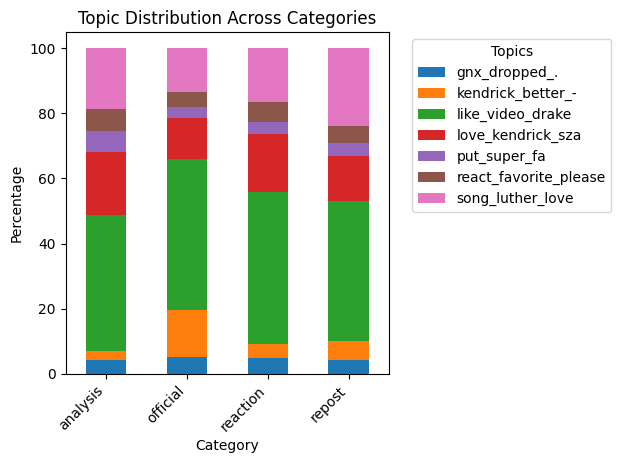

In [27]:
# Plot topics distribution across categories
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate topic distribution per category
topic_dist = comments_df.groupby(['category', 'topic']).size().unstack()
topic_dist_pct = topic_dist.div(topic_dist.sum(axis=1), axis=0) * 100

# Create stacked bar plot
plt.figure(figsize=(15,8))
ax = topic_dist_pct.plot(kind='bar', stacked=True)

plt.title('Topic Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()
